# **Reinforcement Learning: Elementos fundamentales**

En Reinforcement Learning, el aprendizaje se produce mediante un bucle clásico agente-entorno:

1. El agente observa la situación actual
2. El agente elige una  acción en base a lo que ve.
3. El entorno responde con una nueva situación y una recompensa.

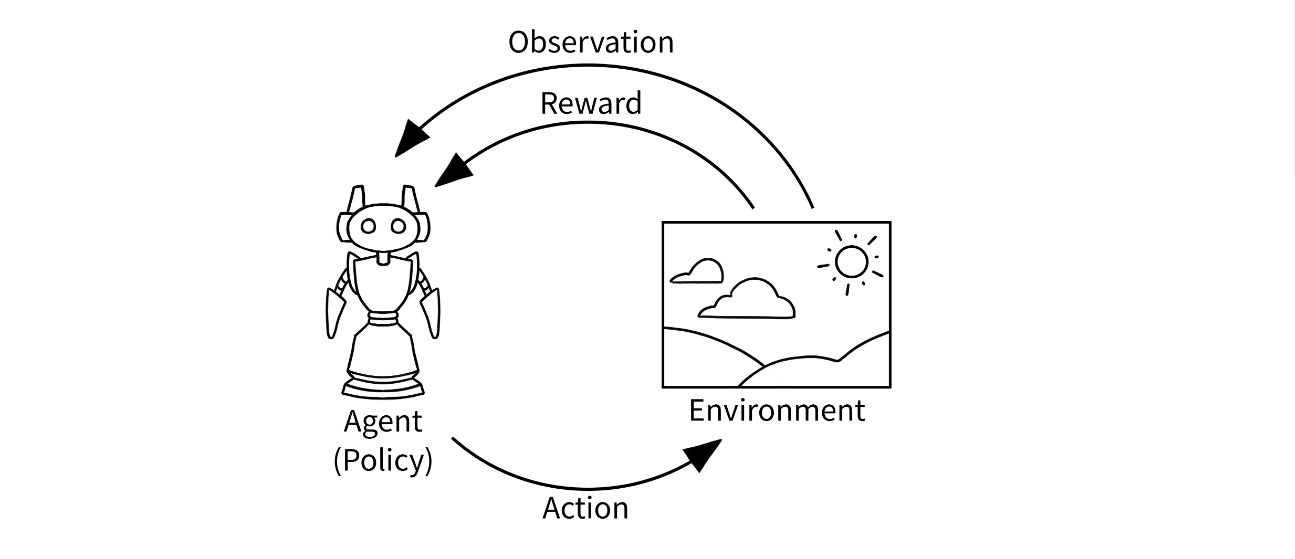

A lo largo del curso trabajaremos principalmente con la librería [Gymnasium](https://gymnasium.farama.org/introduction/basic_usage/), que cuenta con una variedad de entornos ya implementados en los que el agente podrá aprender el comportamiento óptimo para cada situación. En esta práctica aprenderemos a manejar los básicos de esta librería (cómo crear un entorno, cómo visualizar el estado inicial, cómo interactuar con el entorno, etc).

En primer lugar, instalaremos las librerías necesarias:

In [ ]:
!pip install gymnasium pygame
!pip install swig
!pip install gymnasium[box2d]
!pip install imageio

### Creación de un entorno

Cuando queramos crear un entorno, utilizaremos `gym.make()`. Por ejemplo, crearemos el entorno `'Taxi-v3'`:

In [ ]:
import gymnasium as gym
env = gym.make('Taxi-v3', render_mode="rgb_array")

Como trabajaremos en Google Colab, nos interesa utilizar `"rgb-array"` como modo de renderización, para poder capturar frames y crear animaciones. Cuando se trabaja en el ordenador local y si el entorno lo permite es posible utilizar el modo de renderización `"human"`, que muestra el aprendizaje en tiempo real.

### Inicialización de un entorno

Siempre inicializaremos el entorno utilizando `env.reset()`, que nos devolverá el estado inicial e información adicional que normalmente no nos interesará:

In [ ]:
state, _ = env.reset()

### Visualización de un entorno

Con `env.render()` podremos visualizar este estado inicial del entorno:

array([[[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[114, 116, 115],
        [114, 116, 115],
        [126, 127, 126],
        ...,
        [112, 113, 111],
        [112, 113, 111],
        [118, 117, 115]],

       ...,

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[115, 112, 112],
        [115, 112, 112],
        [119, 119, 117],
        ...,
        [123, 119, 118],
        [123, 119, 118],
        [114, 114, 117]]], dtype=uint8)
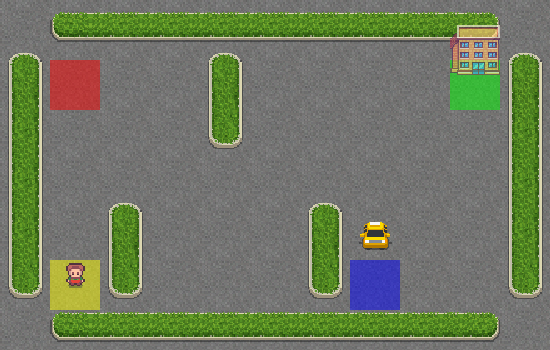

In [ ]:
env.render()

### Observation space & Action space

Para poder interactuar con el entorno y elegir nuevas acciones que conducen a nuevos estados u observaciones, cada entorno especifica el formato de acciones y observaciones válidas mediante los atributos `observation_space` y `action_space`. Aunque existen más, los dos tipos de espacio más comunes son los tipo **Discrete** y tipo **Box**.

#### Ejemplo 1: Taxi-v3

En el caso del entorno `Taxi-v3`, tanto *observation space* como *action space* son espacios de tipo **Discrete**, es decir, un conjunto finito de enteros $[a, a+1, ..., a + n]$

In [ ]:
print(env.observation_space)

Discrete(500)


In [ ]:
print(env.action_space)

Discrete(6)


Si los espacios son discretos, podemos saber cuántos posibles valores existen (ya sean observaciones/estados o acciones):

In [ ]:
print("Número de estados posibles:", env.observation_space.n)

Número de estados posibles: 500


In [ ]:
print("Número de acciones posibles:", env.action_space.n)

Número de acciones posibles: 6


En el entorno de `Taxi-v3` existen 500 estados posibles y 6 acciones posibles.

Siempre que terminemos de trabajar con un entorno, ejecutaremos `env.close()` para cerrarlo de forma correcta:

In [ ]:
env.close()

#### Ejemplo 2: CartPole-v1

Creamos este nuevo entorno como anteriormente utilizando `gym.make()`, seguido de `env.reset()` y visualizamos el estado inicial con `env.render()`:

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
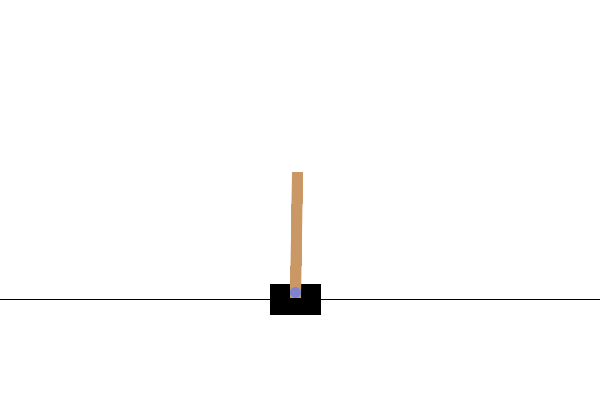

In [ ]:
env = gym.make('CartPole-v1', render_mode='rgb_array')
state, _ = env.reset()
env.render()

El entorno `CartPole-v1` tiene un espacio de observación tipo **Box** 4-dimensional, en el que cada componente representa una característica determinada y puede tomar valores en un intervalo:
- Posición del carrito $(-4.8, 4.8)$
- Velocidad del carrito $(-∞, ∞)$
- Ángulo de la barra $(-24º, 24º)$
- Velocidad angular de la barra $(-∞, ∞)$

In [ ]:
print(env.observation_space)

Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)


El estado inicial es un vector de 4 componentes que indican, por orden, los valores de la posición y velocidad del carrito, el ángulo y la velocidad angular de la barra.

In [ ]:
print(f"Estado inicial: {state}")

Estado inicial: [-0.03497078 -0.04992447  0.0135255  -0.00137874]


En un espacio tipo **Box** cada variable puede tomar valores continuos dentro de un intervalo, el número de posibles estados no es finito. En este caso no podemos utilizar `env.observation_space.n` para averiguar el número de estados posibles, únicamente podemos mirar las dimensiones con `env.observation_space.shape`:

In [ ]:
print(env.observation_space.shape)

(4,)


El espacio de acciones de `CartPole-v1` es discreto. Solo hay dos acciones posibles, aplicar fuerza hacia la izquierda o hacia la derecha.

In [ ]:
print(env.action_space)

Discrete(2)


Y en este caso sí aplicaría el uso de `env.action_space.n` para obtener el número de posibles acciones:

In [ ]:
print("Número de acciones posibles:", env.action_space.n)

Número de acciones posibles: 2


Cerramos el entorno:

In [ ]:
env.close()

#### Ejemplo 3: LunarLander

También el entorno `LunarLander-v3` tiene un espacio de observación tipo **Box**:

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
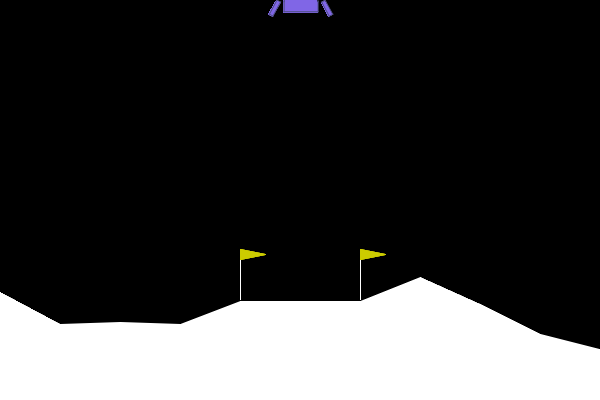

In [ ]:
env = gym.make('LunarLander-v3', render_mode='rgb_array')
state, _ = env.reset()
env.render()

En este caso, cada estado es un vector 8-dimensional que representa:
- Coordenadas `x` e `y` de la nave.
- Velocidades lineales en `x` e `y` de la nave.
- Ángulo
- Velocidad angular
- Booleanos para indicar si la pierna (izquierda o derecha) de la nave está en contacto con el suelo.

In [ ]:
print(f"Observation space: {env.observation_space}")

Observation space: Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)


In [ ]:
print(f"Estado inicial: {state}")

Estado inicial: [ 0.00212441  1.3988376   0.21516907 -0.537001   -0.00245492 -0.04873896
  0.          0.        ]


In [ ]:
print(env.observation_space.shape)

(8,)


Cerramos el entorno:

In [ ]:
env.close()

### Interactuar con el entorno

El método `env.step()` de un entorno ejecuta un paso de la dinámica del entorno **en función de la acción escogida** por el agente.

Devuelve:
- `observation` o `next_state`: la siguiente observación después de la acción.
- `reward`: la recompensa de haber tomado esa acción.
- `terminated`: booleano que indica si el agente ha alcanzado un estado terminal.
- `truncated`: booleano que indica si la condición para truncamiento se ha cumplido. (Por ejemplo, imaginemos que establecemos un límite de tiempo de interacción agente-entorno que no se debe sobrepasar).
- `info`: información auxiliar

Volvamos al entorno de `Taxi-v3` para ver un ejemplo:

In [ ]:
env = gym.make('Taxi-v3', render_mode="rgb_array")

In [ ]:
state, _ = env.reset()

Esta vez elegiremos una acción al azar y después ejecutaremos `env.step()` con esta acción aleatoria. En general, la política es la que nos dirá qué acción se debe escoger.

In [ ]:
# Acción aleatoria
action = env.action_space.sample()

# Interacción con el entorno producida por esa acción
observation, reward, terminated, truncated, info = env.step(action)
print(f"Action: {action}")
print(f"Observation: {observation}")
print(f"Reward: {reward}")
print(f"Terminated: {terminated}")
print(f"Truncated: {truncated}")
print(f"Info: {info}")

Action: 3
Observation: 434
Reward: -1
Terminated: False
Truncated: False
Info: {'prob': 1.0, 'action_mask': array([0, 1, 1, 0, 0, 0], dtype=int8)}


In [ ]:
env.close()

## Generar un episodio

En Reinforcement Learning muchos problemas se modelan como tareas episódicas, es decir, problemas que se desarrollan a lo largo de un episodio con un inicio y un final bien definidos. Un episodio comienza en un estado inicial del entorno y progresa mediante la interacción del agente, que en cada paso selecciona una acción.

El entorno responde con `env.step()` devolviendo el nuevo estado, una recompensa y una señal que indica si el episodio ha terminado. Este ciclo de interacción continúa hasta que se alcanza una condición de finalización, como llegar a una meta o superar un número máximo de pasos.

La estructura básica para generar un episodio es:

- Restear el entorno y obtener el estado inicial.

- Mientras el episodio no haya terminado:

    - Elegir una acción.

    - Ejecutarla en el entorno.

    - Recibir el siguiente estado, la recompensa y el indicador de finalización o truncamiento.

Esto se traduce a código de la siguiente manera:

In [ ]:
# Resetear el entorno para obtener el estado inicial
state, _ = env.reset()

# Indicador de terminación del episodio en False
done = False

while not done:
    # Se escoge una acción (en este caso al azar pero normalmente será
    # resultado de una política en función del estado en el que nos encontremos)
    action = env.action_space.sample()
    # Se interactúa con el entorno para obtener siguiente estado y recompensa
    next_state, reward, terminated, truncated, info = env.step(action)
    # El episodio habrá terminado si así lo indican terminated o truncated
    done = terminated or truncated
    # Actualizamos la variable estado al nuevo
    state = next_state

In [ ]:
# O bien si no estamos seguros de alcanzar el estado terminal o simplemente
# queremos hacer una pequeña prueba podemos definir un número de pasos
# máximos para el episodio y romper el bucle si el episodio termina
state, _ = env.reset()
n_steps = 1000
for _ in range(n_steps):
    action = env.action_space.sample()
    next_state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    state = next_state
    if done:
        break

## Extra: Otras librerías

Además de Gymnasium, existen otras librerías que ofrecen colecciones de entornos de Reinforcement Learning listos para su utilización o herramientas que permiten crear y simular entornos complejos y personalizados.

Entrenar agentes en este tipo de entornos suele requerir de GPU y mucho tiempo de computación, por lo que no los utilizaremos en las sesiones de prácticas.

### Atari

[Arcade Learning Environment (ALE)](https://ale.farama.org/environments/) cuenta con una colección de entornos implementados de los juegos de la consola Atari.

Ejemplo 1: [Galaxian](https://ale.farama.org/environments/galaxian/)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
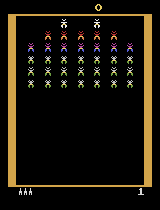

In [ ]:
import gymnasium as gym
import ale_py

gym.register_envs(ale_py)

env = gym.make("ALE/Galaxian-v5", render_mode="rgb_array")
state, _ = env.reset()
env.render()

Ejemplo 2: [Breakout](https://ale.farama.org/environments/breakout/)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
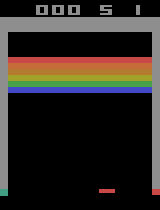

In [ ]:
env = gym.make("ALE/Breakout-v5", render_mode="rgb_array")
state, _ = env.reset()
env.render()

Ejemplo 3: [Ms Pacman](https://ale.farama.org/environments/ms_pacman/)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[228, 111, 111],
        [228, 111, 111],
        [228, 111, 111],
        ...,
        [228, 111, 111],
        [228, 111, 111],
        [228, 111, 111]],

       [[228, 111, 111],
        [228, 111, 111],
        [228, 111, 111],
        ...,
        [228, 111, 111],
        [228, 111, 111],
        [228, 111, 111]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
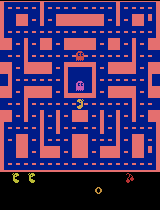

In [ ]:
env = gym.make("ALE/MsPacman-v5", render_mode="rgb_array")
state, _ = env.reset()
env.render()

### PettingZoo

[PettingZoo](https://pettingzoo.farama.org/) cuenta con entornos para problemas de tipo Multi-Agente.

Un problema multi-agente es una situación donde múltiples agentes interactúan simultáneamente en un mismo entorno, y cada uno de ellos aprende y toma decisiones basadas no solo en las recompensas y estados del entorno, sino también considerando las acciones y estrategias de los otros agentes. Los agentes pueden colaborar, competir o coexistir con distintos objetivos.

### Unity ML Agents

[Unity ML Agents](https://github.com/Unity-Technologies/ml-agents/blob/develop/docs/Learning-Environment-Examples.md) es un proyecto de código abierto que permite que los juegos y simulaciones funcionen como entornos para entrenar agentes inteligentes. Ofrece implementaciones basadas en PyTorch de algoritmos de última generación para poder entrenar fácilmente agentes inteligentes en juegos 2D, 3D y de VR/AR. Incluye una API de Python para entrenar agentes utilizando aprendizaje por refuerzo, aprendizaje por imitación u otros métodos.

Permite la creación de entornos mucho más complejos y realistas que los clásicos de Gymnasium.

### Godot

[Godot RL Agents](https://github.com/edbeeching/godot_rl_agents) es un framework de código abierto que permite enseñar comportamientos complejos a sus personajes no jugables (NPCs) o agentes. Godot RL Agents proporciona una interfaz entre los juegos creados en el motor [Godot Engine](https://godotengine.org/es/) y los algoritmos de Machine Learning que se ejecutan en Python, además de wrappers (adaptadores) para 4 conocidos frameworks de entrenamiento de algoritmos de RL: StableBaselines3, Sample Factory, Ray RLLib y CleanRL.



### Diambra

[Diambra Arena](https://docs.diambra.ai/envs/) es una plataforma gratuita que ofrece entornos de videojuegos listos para entrenar agentes de IA mediante Aprendizaje por Refuerzo.

Ofrece juegos de arcade emulados con una interfaz estándar compatible con OpenAI Gym. Funciona en Linux, Windows y MacOS y se instala fácilmente con Python PIP. Incluye ejemplos listos para ejecutar, para aprender y probar tus agentes en pocos pasos.

Todos sus entornos son tareas episódicas de RL, donde los agentes aprenden paso a paso. Las acciones son discretas, como presionar botones de gamepad, y las observaciones combinan los píxeles de la pantalla y datos del juego como barras de vida o posición de los personajes.

Soporta uno o dos jugadores, permitiendo experimentar con agentes individuales o competiciones.